In [13]:
from loadingCGAN.swagan import Swagan
from learning_mnist import learning_mnist
from utils.config_mnist import epochs, number_of_gans, switches, latent_dim, x_train_size, title
from utils.config_mnist import smooth_zero, smooth_one, dropout, leaky_relu, noise, activation, save_model
from load_data.load_cifar import load_cifar, draw_img
from time import time
from loadingCGAN.utils_cgan import save_time
import numpy as np

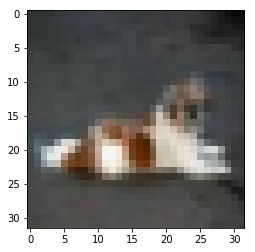

In [14]:
########
# DATA #
########
x_train, x_test, y_train, y_test, x_train_cv, data_dim = load_cifar(cv_size=.1)

draw_img(x_train=x_train, i=np.random.randint(1000))

In [15]:
x_train = x_train.reshape((45000,32*32*3))
x_train_cv = x_train_cv.reshape((5000,32*32*3))

In [16]:
##########
# SWAGAN #
##########
swagans = [Swagan(data_dim=32*32*3, latent_dim=latent_dim, leaky_relu=leaky_relu, dropout=dropout,
                  spectral_normalisation=False,
                  weight_clipping=False, verbose=True,
                  activation=activation,
                  noise=noise) for _ in range(2)]

CHOSEN OPTIMIZER IS ADAM

 
 Discriminator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_62 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)   

In [18]:
############
# LEARNING #
############
start = time()
swagans = learning_mnist(swagans=swagans, x=x_train[:200], x_cv=x_train_cv[:200],
                         number_of_gans=2,
                         epochs=epochs, switches=switches, print_mode=True,
                         smooth_zero=smooth_zero, smooth_one=smooth_one, title=title)
end = time()
duration = end - start
save_time(duration=duration, location="tmp/", title=title)



  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:07<02:22,  7.52s/it]

 10%|█         | 2/20 [00:07<01:37,  5.40s/it]

 15%|█▌        | 3/20 [00:08<01:06,  3.91s/it]

 20%|██        | 4/20 [00:08<00:45,  2.87s/it]

 25%|██▌       | 5/20 [00:09<00:32,  2.14s/it]

 30%|███       | 6/20 [00:09<00:22,  1.63s/it]

 35%|███▌      | 7/20 [00:10<00:16,  1.28s/it]

 40%|████      | 8/20 [00:10<00:12,  1.03s/it]

 45%|████▌     | 9/20 [00:11<00:09,  1.18it/s]

 50%|█████     | 10/20 [00:11<00:07,  1.37it/s]

 55%|█████▌    | 11/20 [00:11<00:05,  1.56it/s]

 60%|██████    | 12/20 [00:12<00:04,  1.72it/s]

 65%|██████▌   | 13/20 [00:12<00:03,  1.85it/s]

 70%|███████   | 14/20 [00:13<00:03,  1.96it/s]

 75%|███████▌  | 15/20 [00:13<00:02,  2.04it/s]

 80%|████████  | 16/20 [00:14<00:01,  2.10it/s]

 85%|████████▌ | 17/20 [00:14<00:01,  2.15it/s]

 90%|█████████ | 18/20 [00:15<00:00,  2.18it/s]

 95%|█████████▌| 19/20 [00:15<00:00,  2.21it/s]

100%|██████████| 20/20 [00:15<00:00,

ValueError: cannot reshape array of size 307200 into shape (100,28,28)

In [21]:
swa = swagans[0]

In [28]:
x_train[0]

array([0.21176471, 0.30980393, 0.20392157, ..., 0.28235295, 0.5019608 ,
       0.3019608 ], dtype=float32)

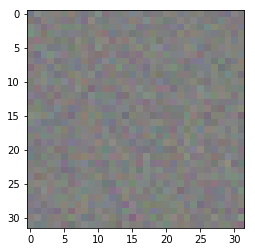

In [34]:
draw_img((swa.generate(1).reshape((1,32,32,3))*100 + 10)/20, 0)

In [14]:
##################
# SAVING RESULTS #
##################
swagan = swagans[0]
swagan.plot_learning(save_mode=True, title=title)
if save_model:
    swagan.save_model(model_name="title")

CHOSEN OPTIMIZER IS ADAM

 
 Discriminator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_91 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_122 (Dense)            (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_92 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_123 (Dense)  


 
 Discriminator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_109 (LeakyReLU)  (None, 1024)              0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_146 (Dense)            (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_110 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 256)    

  0%|          | 0/50 [00:00<?, ?it/s]


ValueError: Error when checking input: expected dense_121_input to have shape (784,) but got array with shape (3072,)

In [12]:
x_train.shape

(45000, 3072)